In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
dataset = pd.read_csv('gapminder.tsv',sep='\t')

In [7]:
dataset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### Question 1 -- distribution of life expectancy by continent

Text(0.5, 0.98, 'Life expectancy distribution by continent')

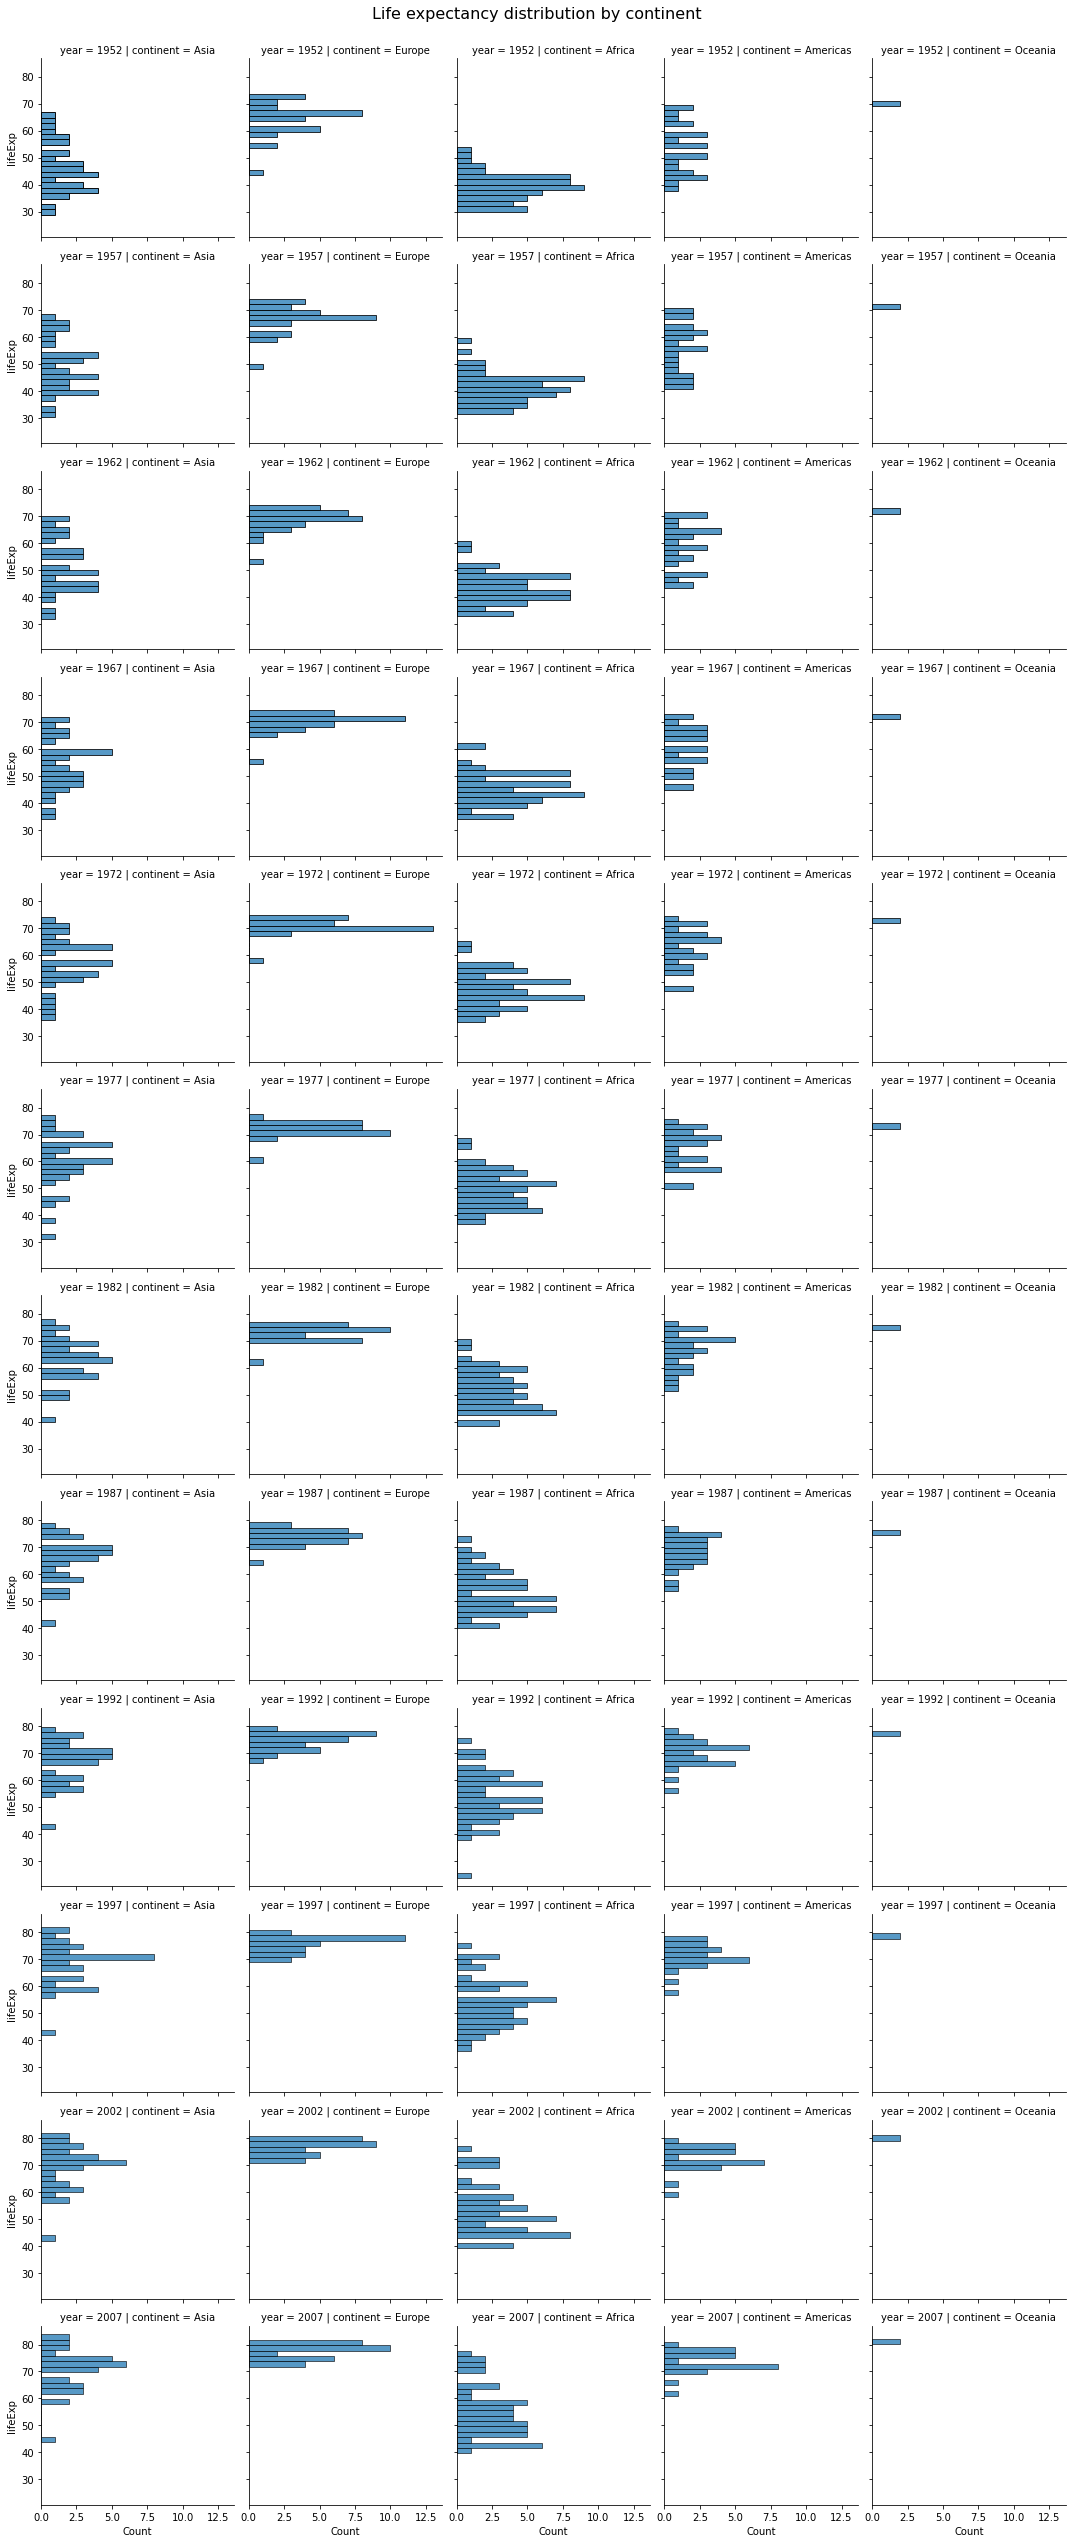

In [7]:
g = sns.FacetGrid(dataset, col="continent", row="year")
g.map_dataframe(sns.histplot, y="lifeExp", binwidth=2)
g.fig.subplots_adjust(top=0.96)
g.fig.suptitle('Life expectancy distribution by continent', fontsize=16)

#### * The distribution over the continents seems significant with year that, as year increases from 1952 to 2007 the life expectancy distribution kept shifting to higher values.

### Question 2 -- time evolution of life expectancy by continent

Text(0.5, 1.0, 'Time evolution of life expectancy by continent')

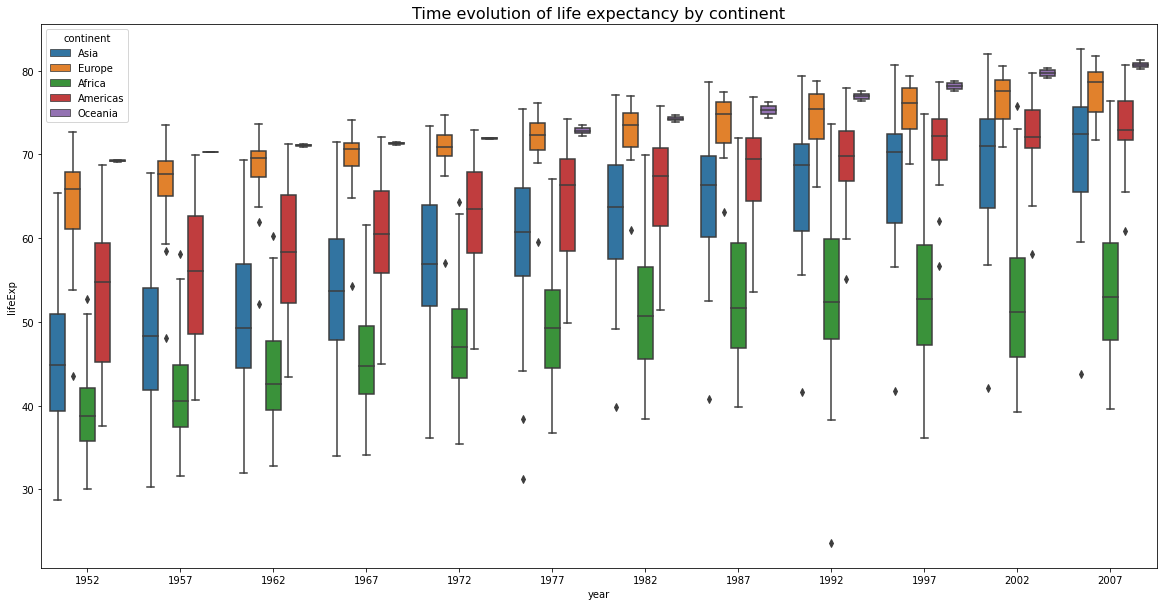

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(data=dataset, x="year", y="lifeExp", hue="continent")
plt.title('Time evolution of life expectancy by continent', fontsize=16)

#### * As years go on from 1952 to 2007, the life expectancies distribution ranges has been shifted to higher values over all the continents.
#### * In Americas continent, the box range(maximum - minumum) has been decreased, whereas in Africa and Oceania continents, it observed increase.
#### * For Asia the range(maximum - minumum) almost remained same.And for europe it kept decreasing in initial few decades, and then increased after that gradually.

### Question 3 -- life expectancy vs GDP

Text(0.5, 0.98, 'Life expectancy vs GDP(Log)')

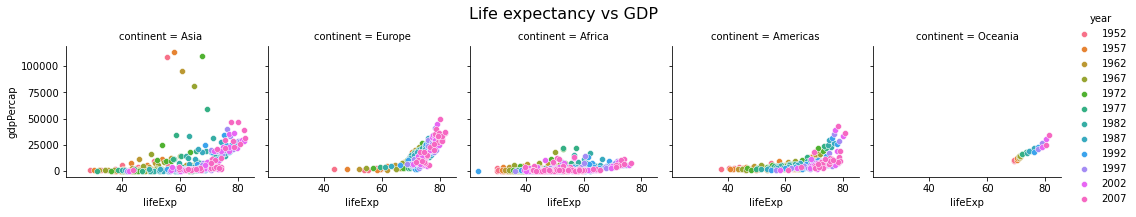

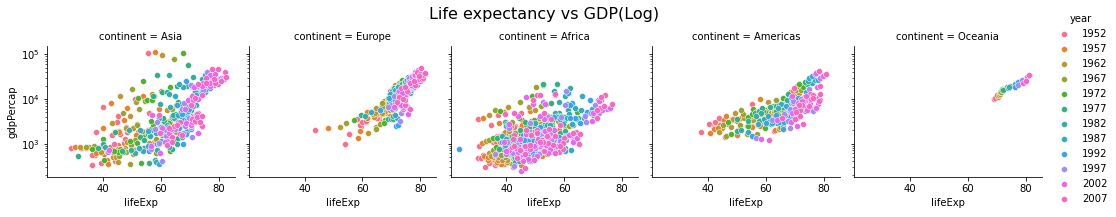

In [14]:
g = sns.FacetGrid(dataset, col="continent",  hue="year")
g.map(sns.scatterplot, "lifeExp", "gdpPercap")
g.add_legend()
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Life expectancy vs GDP', fontsize=16)

g = sns.FacetGrid(dataset, col="continent",  hue="year")
g.map(sns.scatterplot, "lifeExp", "gdpPercap")
g.set(yscale="log")
g.add_legend()
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Life expectancy vs GDP(Log)', fontsize=16)

#### * Looking at the first scatter plot most of the points are clumped in a small region of y-axis and the pattern we see is dominated by the outliers.
#### * With the use of linear and log scale, we can see a linear pattern between lifeExp and gdpPercap.

### Question 4 -- PDF of life expectancy

Text(0.5, 1.0, 'PDF of life expectancy')

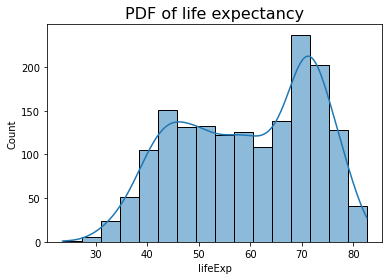

In [17]:
sns.histplot(data=dataset, x="lifeExp", kde=True)
plt.title('PDF of life expectancy', fontsize=16)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'PDF of life expectancy')

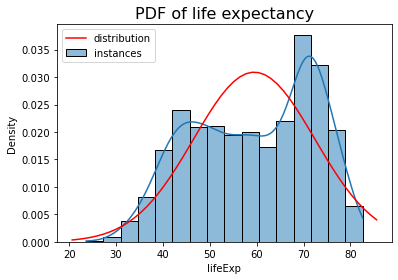

In [18]:
from scipy import stats  

ax = sns.histplot(data=dataset, x="lifeExp", stat='density', kde=True, label='instances')
print(ax)
x0, x1 = ax.get_xlim()
mu, sigma = stats.norm.fit(dataset['lifeExp'])
x_pdf = np.linspace(x0, x1)
y_pdf = stats.norm.pdf(x_pdf, mu, sigma)

ax.plot(x_pdf, y_pdf, 'r', label='distribution')
ax.legend()
plt.title('PDF of life expectancy', fontsize=16)

#### * A normal distribution is initially observed, and later with time as the life expectancy has been kept increasing on average over all the continents, the count or density distribution has been more again at higher values.
#### * This formed a big hump in the density distrubution plot at higher life expectancies.